<a href="https://colab.research.google.com/github/sashaTribe/svc-on-wineData/blob/main/svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy.linalg as linalg
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
print(tf. __version__)

2.9.2


Number of columns: 13


Text(0.5, 1.0, 'Ground Truth')

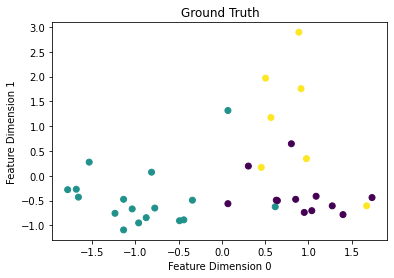

In [ ]:
wine_data = np.load('wineData.npy')
wine_labels = np.load('wineLabels.npy')
train_data,test_data,train_labels,test_labels = train_test_split(wine_data, wine_labels,  test_size=0.20, random_state=0)
  
scaler = StandardScaler()
X_trn = scaler.fit_transform(train_data)
X_tst = scaler.transform(test_data)
plt.figure()
plt.scatter(X_tst[:,0], X_tst[:,1], c=test_labels)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Ground Truth')




0.4722222222222222


Text(0.5, 1.0, 'Predictions')

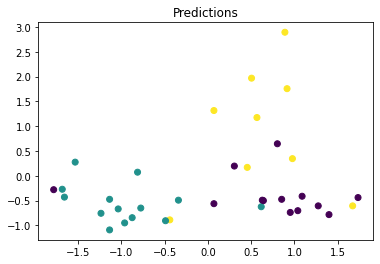

In [ ]:
svc = SVC(kernel = 'linear')
fit_data = svc.fit(train_data,train_labels)
predict = svc.predict(test_data)
mean_accuracy = svc.score(X_tst,test_labels)
print(mean_accuracy)
#plt.figure(figsize=[10,5])
plt.scatter(X_tst[:,0], X_tst[:,1], c=predict)
plt.title("Predictions")


In [ ]:
model = tf.keras.Sequential(layers=[
        layers.Dense(4, activation=tf.nn.relu),
        layers.Dense(10, activation=tf.nn.relu,),
        layers.Dense(len(np.unique(train_labels)), activation=tf.nn.softmax),
    ]
)
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())
history = model.fit(X_trn,train_labels, epochs=200, validation_split=0.2,verbose=1)


Epoch 1/200
4/4 [==============================] - 0s 40ms/step - loss: 1.2875 - sparse_categorical_accuracy: 0.2655 - val_loss: 1.2867 - val_sparse_categorical_accuracy: 0.2414
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 1.2595 - sparse_categorical_accuracy: 0.2389 - val_loss: 1.2593 - val_sparse_categorical_accuracy: 0.2414
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 1.2367 - sparse_categorical_accuracy: 0.2301 - val_loss: 1.2361 - val_sparse_categorical_accuracy: 0.2414
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 1.2175 - sparse_categorical_accuracy: 0.2301 - val_loss: 1.2157 - val_sparse_categorical_accuracy: 0.2414
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 1.1994 - sparse_categorical_accuracy: 0.2566 - val_loss: 1.1949 - val_sparse_categorical_accuracy: 0.2414
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 1.1820 - sparse_categorical_accuracy: 0.283

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 56        
                                                                 
 dense_7 (Dense)             (None, 10)                50        
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Accuracy Curves')

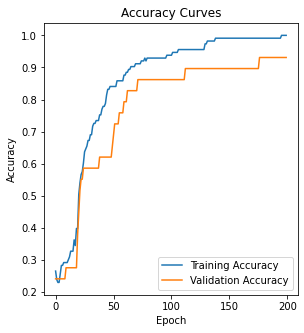

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

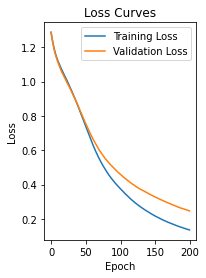

In [ ]:
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f'MNIST sample shape: {x_train.shape[1:]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')
print(f'Number of columns: {len(x_train[0])}')

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Number of columns: 28


In [ ]:
train_reshape = np.reshape(x_train, (60000,784)).astype('float32')/255.0
test_reshape = np.reshape(x_test,(10000,784)).astype('float32')/255.0

In [ ]:
def normalise_data(dataset):
  for i in range(len(dataset)):
    for j in dataset[i]:
      dataset[i][j] = dataset[i][j]/255
  return dataset

In [ ]:
normalise_train = normalise_data(train_reshape)


NameError: ignored

In [ ]:
normalised_test = test_reshape.astype('float32')/255.0


In [ ]:
n_model = tf.keras.Sequential(layers=[
        layers.Dense(4, activation=tf.nn.relu),
        layers.Dense(10, activation=tf.nn.relu,),
        layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax),
    ]
) 
n_model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history1 = n_model.fit(train_reshape,y_train, epochs=90, validation_split=0.2,verbose=1)

Epoch 1/90
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7948 - sparse_categorical_accuracy: 0.3480 - val_loss: 1.2885 - val_sparse_categorical_accuracy: 0.5561
Epoch 2/90
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0552 - sparse_categorical_accuracy: 0.6360 - val_loss: 0.8046 - val_sparse_categorical_accuracy: 0.7573
Epoch 3/90
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7390 - sparse_categorical_accuracy: 0.7868 - val_loss: 0.6321 - val_sparse_categorical_accuracy: 0.8201
Epoch 4/90
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6242 - sparse_categorical_accuracy: 0.8199 - val_loss: 0.5625 - val_sparse_categorical_accuracy: 0.8342
Epoch 5/90
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5731 - sparse_categorical_accuracy: 0.8348 - val_loss: 0.5342 - val_sparse_categorical_accuracy: 0.8419
Epoch 6/90
  91/1500 [>.............................] - ETA: 1s - loss: 0.5265 - sparse_ca

KeyboardInterrupt: ignored

In [ ]:
n_model.summary()
y_test = y_test.astype("float32")

results = n_model.evaluate(normalised_test, y_test)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')
predictions = n_model.predict(normalised_test)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (32, 4)                   3140      
                                                                 
 dense_33 (Dense)            (32, 10)                  50        
                                                                 
 dense_34 (Dense)            (32, 10)                  110       
                                                                 
Total params: 3,300
Trainable params: 3,300
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.4114 - sparse_categorical_accuracy: 0.8786
Test set loss: 0.41, test set accuracy: 87.86%
313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Accuracy Curves')

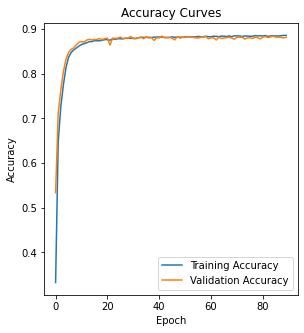

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history1.history['sparse_categorical_accuracy'])
plt.plot(history1.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

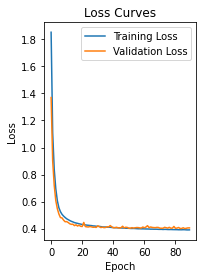

In [ ]:
plt.subplot(122)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

Task 4.4

In [ ]:
X_train_data = np.expand_dims(x_train, axis=(3)).astype('float32')/255.0
X_test_data = np.expand_dims(x_test, axis=(3)).astype('float32')/255.0

X_train_data.shape
X_test_data.shape

(10000, 28, 28, 1)

In [ ]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([[[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]]], dtype=float32)

In [ ]:
input_train_shape = (28, 28, 1)
input_test_shape = (10000,28,28,1)
x = tf.random.normal(input_train_shape)
model3 = Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])
#model3.add(layers.MaxPooling)


In [ ]:
model3.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 100)               540900    
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [ ]:
model3.fit(x = X_train_data, y = y_train, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ValueError: ignored